### Instalar Tensorflow

En consola ejecute el siguiente comando. 

In [1]:
#conda install -c conda-forge tensorflow

Para instalar `sklearn` use el canal de Intel, que matiene la librería actualizada

In [2]:
# conda install -c intel scikit-learn

## <span style="color:blue">Carga librerías requeridas</span>

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelBinarizer

## <span style="color:blue">Trabajando con los datos</span>

In [4]:
# Carga el dataset CIFAR-10 
print("Cargando el dataset CIFAR-10...")
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()
print('¡¡Hecho!!')

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Escala los datos al rango [0, 1]
trainX = x_train.astype("float32") / 255.0
testX = x_test.astype("float32") / 255.0

# convierte las etiquetas de enteros a vectores (no necesario en realidad)
lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)

rows = x_train.shape[1]
cols = x_train.shape[2]
channels = x_train.shape[3]

Cargando el dataset CIFAR-10...
170498071/170498071 [==============================] - 37s 0us/step
¡¡Hecho!!


In [5]:
print(len(trainY))
print(testY[0])

50000
[0 0 0 1 0 0 0 0 0 0]


### Una primera imagen de los datos

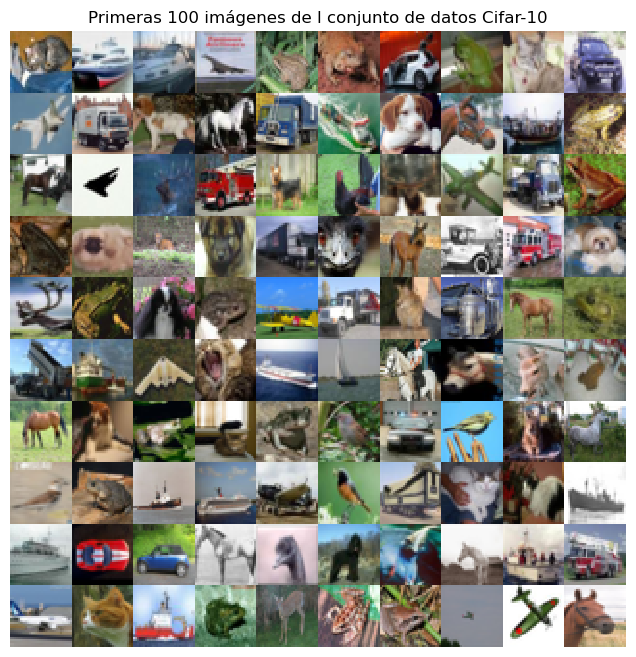

In [6]:
# Muestra las primeras 100  images en color

img_rows = rows
img_cols = cols

imgs_t = x_test[:100]
imgs_t = imgs_t.reshape((10, 10, img_rows, img_cols, channels))
imgs_t = np.vstack([np.hstack(i) for i in imgs_t])
plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('Primeras 100 imágenes de l conjunto de datos Cifar-10')
plt.imshow(imgs_t, interpolation='none')
plt.savefig('./test_color.png')
plt.show()

## <span style="color:blue">Creando modelos</span>

In [7]:
# define model
class NeuralNetwork(Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.linear_relu_stack = Sequential([
            InputLayer(input_shape=(32,32,3)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(512, activation='relu'),
            Dense(10, activation='softmax'),            
        ])
                  
    # la función call es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntete libre de usar más
    def call(self, x):
        probs = self.linear_relu_stack(x)
        return probs

model = NeuralNetwork()


2024-01-16 16:53:30.435419: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-16 16:53:30.435902: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-16 16:53:30.435924: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-16 16:53:30.436309: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-16 16:53:30.437304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Necesitamos instalar

In [10]:
#!conda install -c anaconda pyyaml h5py